# Notebook II project

## Description de este experimento

### Cambio lineal de tasas de aprendizaje (1e-5 hasta 1e-4) usando como optimizador RMSPropOptimizer

En primer lugar se evalua con mammo y dcgan. 



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [2]:
mammo = np.load('results/mammo/mammo.npz')['loss']
dcgan = np.load('results/dcgan/dcgan.npz')['loss']

In [3]:
learning =  np.linspace(1e-5,1e-4,10)

In [7]:
def toplot(data,learning,title,sel):
    fig = plt.figure(figsize = (10,5))
    for c,i in enumerate(data):
        plt.plot(i[sel,:,0],i[sel,:,1],label= learning[c])
    #add mean
    plt.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0), "-.",
             linewidth = 4,color = "grey")
    
    x = plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(title)
    

<IPython.core.display.Javascript object>


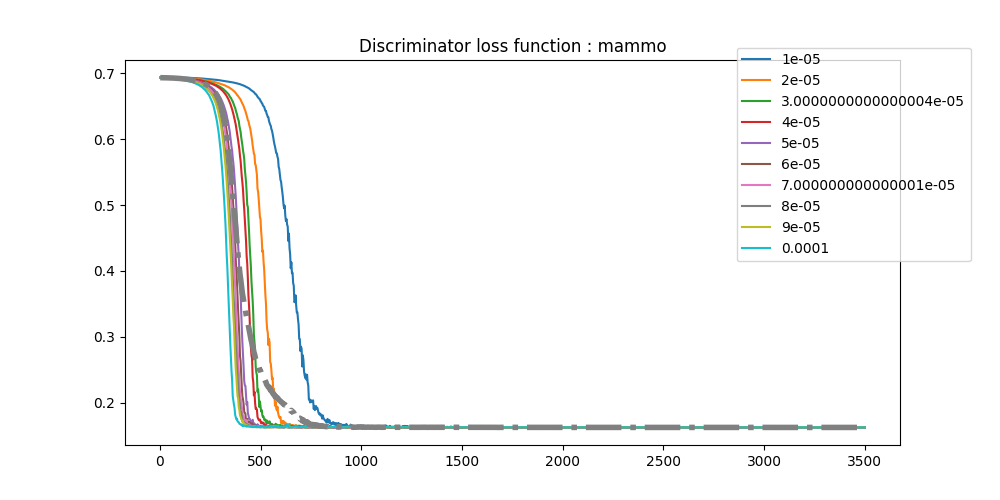

<IPython.core.display.Javascript object>


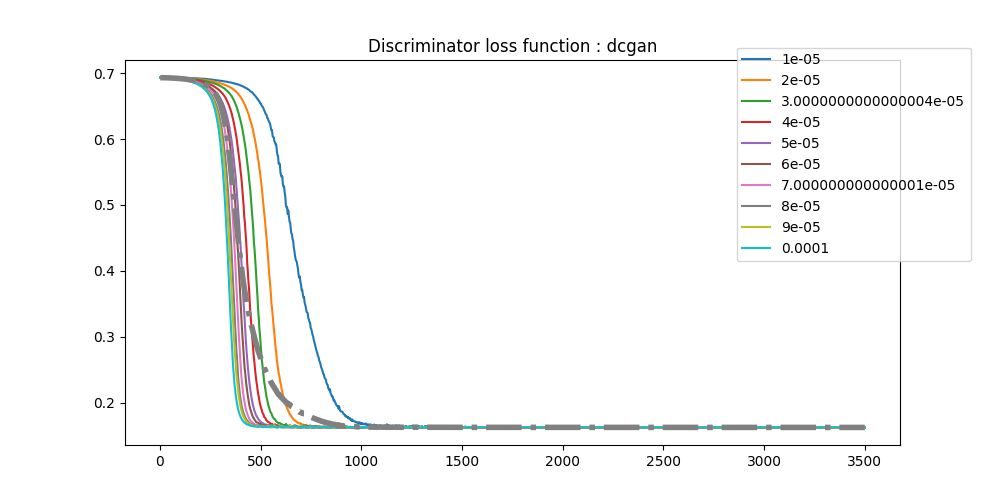

In [16]:
toplot(mammo,learning,"Discriminator loss function : mammo",0)
toplot(dcgan,learning,"Discriminator loss function : dcgan",0)

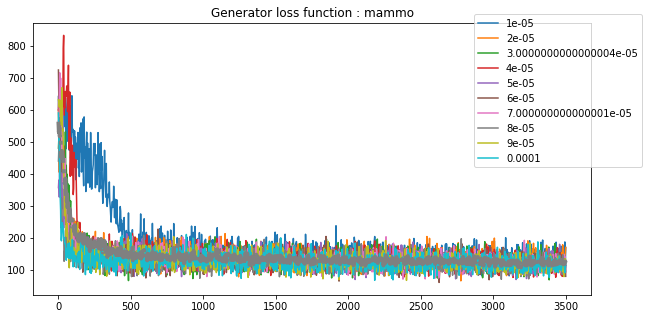

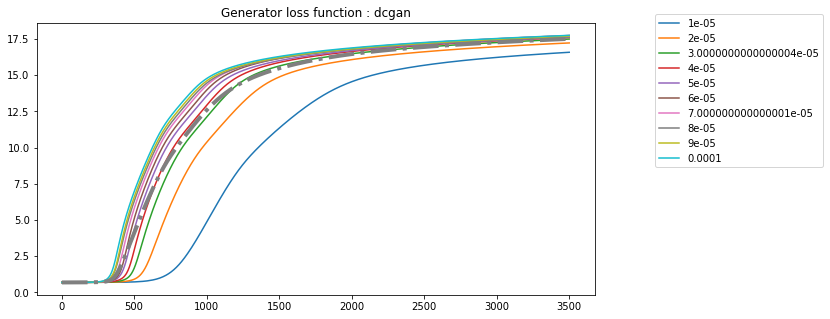

In [42]:
toplot(mammo,learning,"Generator loss function : mammo",1)
toplot(dcgan,learning,"Generator loss function : dcgan",1)

In [14]:
data = np.mean(dcgan[:,1,:,1],axis=0)

# Exp no 2

In [20]:
lsgan = np.load('results/lsgan1.0e-04/lsgan.npz')['loss']
wgan = np.load('results/wgan1.0e-04/wgan.npz')['loss']
learning =  np.linspace(1e-5,1e-4,10)

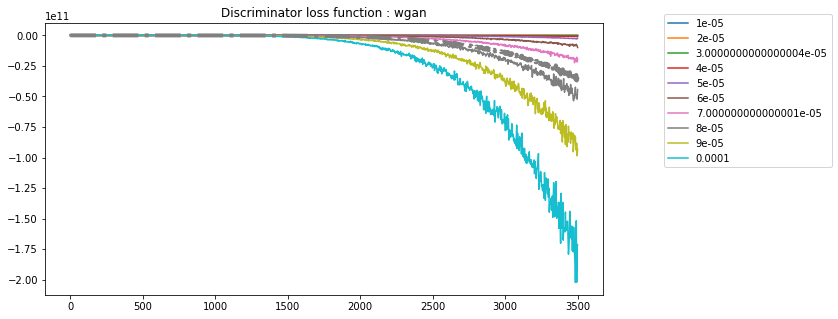

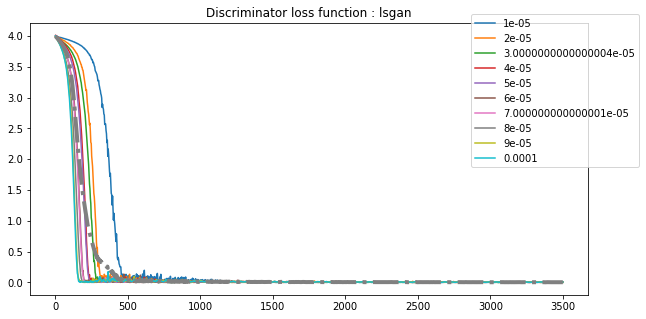

In [23]:
toplot(wgan,learning,"Discriminator loss function : wgan",0)
toplot(lsgan,learning,"Discriminator loss function : lsgan",0)

In [6]:
%matplotlib notebook

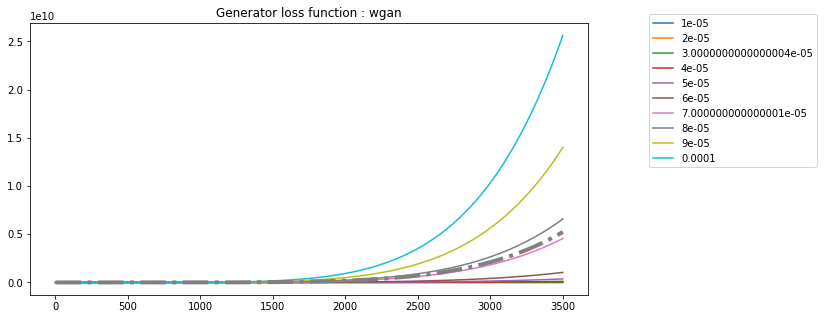

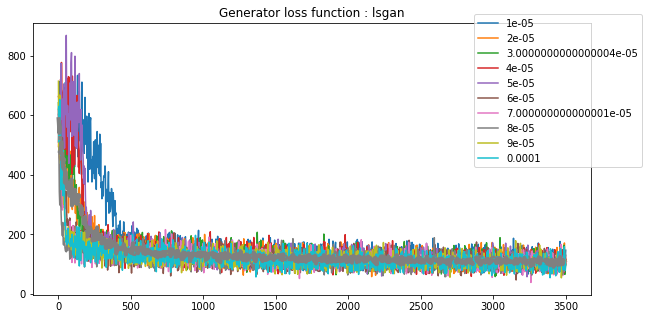

In [9]:
toplot(wgan,learning,"Generator loss function : wgan",1)
toplot(lsgan,learning,"Generator loss function : lsgan",1)

In [94]:
%matplotlib inline

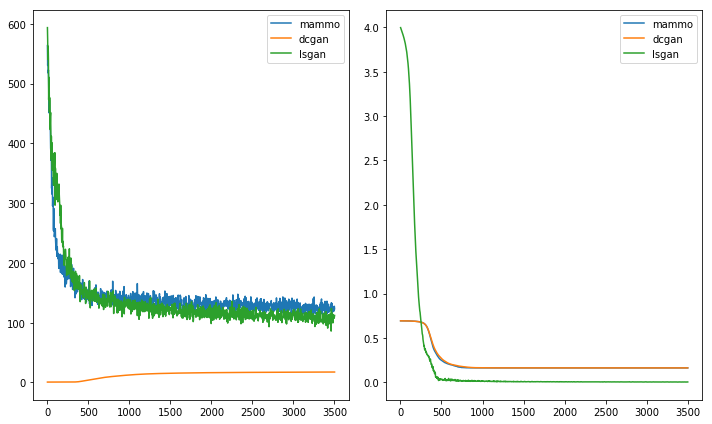

In [45]:
sel = 1
fig,(ax,ax2) = plt.subplots(1,2,figsize = (10,6))
for data in [mammo,dcgan,lsgan]:
    ax.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))

ax.legend(["mammo","dcgan","lsgan"])
sel = 0
for data in [mammo,dcgan,lsgan]:
    ax2.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))
    
ax2.legend(["mammo","dcgan","lsgan"])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#analyze wgan

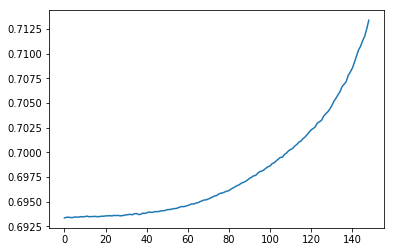

In [27]:
v = data[0,1,:,0] < 450
plt.plot(data[0,1,:,1][v])

# #when the output become black?


In [1]:

def get_slope(time_vector):
    return (((np.max(time_vector)-np.min(time_vector))/(len(time_vector))))

In [60]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [37]:
%matplotlib inline

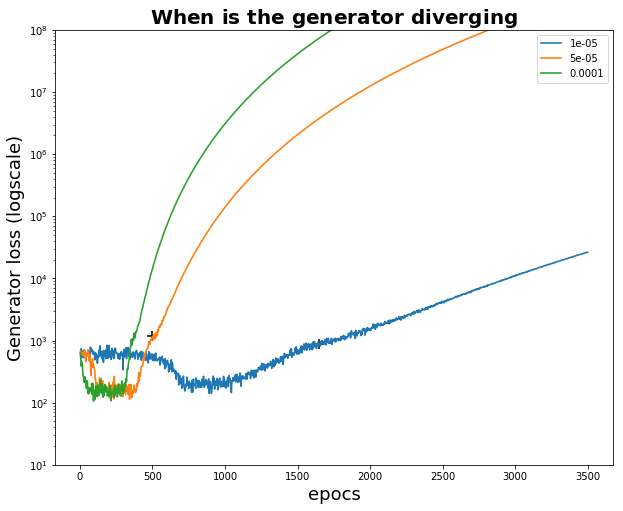

In [55]:
### id = [0,4,7]
lr = [1e-5,5e-5,1e-4]
index = [1650,500,300]

plt.figure(figsize = (10,8))
data = wgan
sel = 1
##generator
slope = get_slope(data[0,sel,:,0])

for c,i in enumerate(id):
    #epoc to index in vector
    lim = int(index[c]//slope)
    plt.plot(data[i,sel,:,0],data[i,sel,:,1],linewidth=1.6, label = lr[c]) 
    #plt.plot(data[i,sel,lim:,0],data[i,sel,lim:,1],linewidth=2,alpha = 0.8)
    plt.scatter(index[c],data[i,sel,lim,1],s=95, color = "black",marker = "+")

if sel:
    plt.yscale("log")
    plt.ylim([1e1,10e7])
plt.title('$\\bf{When\ is\ the\ generator\ diverging}$',
         fontsize=20)
plt.xlabel("epocs",fontsize=18)
plt.ylabel("Generator loss (logscale)",fontsize=18)
plt.legend()
plt.show()

#add annotation and image for each point de divergence ?

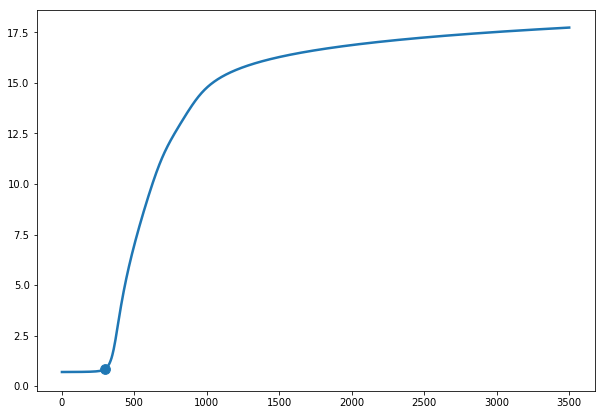

In [8]:
plt.figure(figsize = (10,7))
data = dcgan
sel = 1
##generator
slope = get_slope(data[0,sel,:,0])

lim = int(300/slope)
plt.plot(data[-1,sel,:,0],data[-1,sel,:,1],linewidth=2.5) 
plt.scatter(300,data[-1,sel,lim,1],s=95)

### 35k epocs
sel = 1
plt.plot(wgan[0,sel,:,0],wgan[0,sel,:,1],label="wgan")
plt.yscale('log')

In [6]:
mammo = np.load('results/mammo.npz')['loss']
lsgan = np.load('results/lsgan.npz')['loss']

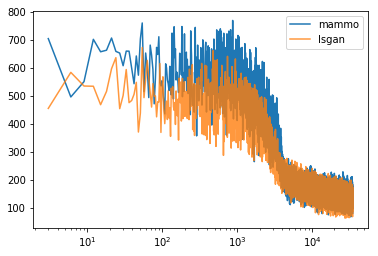

In [10]:
plt.plot(mammo[0,sel,:,0],mammo[0,sel,:,1],label="mammo")
plt.plot(lsgan[0,sel,:,0],lsgan[0,sel,:,1],label = "lsgan",alpha=0.8)
plt.xscale('log')
plt.legend()


###  plot result to select the best lr

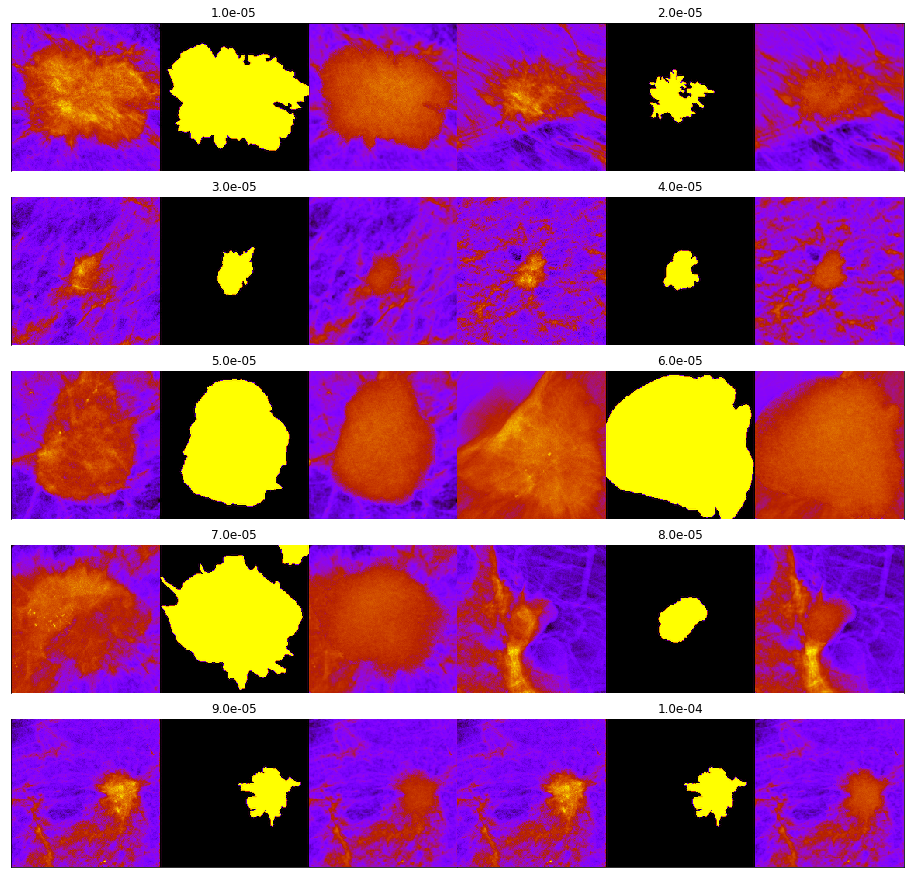

In [25]:
from itertools import product
import matplotlib.gridspec as gridspec

from itertools import product


def squiggle_xy(a, b, c, d):
    i = np.arange(0.0, 2*np.pi, 0.05)
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

learning =  np.linspace(1e-5,1e-4,10)

fig = plt.figure(figsize=(16, 16))
path =  "./validation/lsgan"
# gridspec inside gridspec
outer_grid = gridspec.GridSpec(5, 2, wspace=0.0, hspace=0.0)

for i in range(10):
    a = i // 6 + 1
    b = i % 2 + 1
    ax = fig.add_subplot(outer_grid[i])
    img = plt.imread("{}{:.1e}/lsgan{:.1e}_256_3450.png".format(path,learning[i],learning[i]))
    ax.imshow(img,cmap = plt.cm.gnuplot)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("{:.1e}".format(learning[i]))
    fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

##add smoothing in d


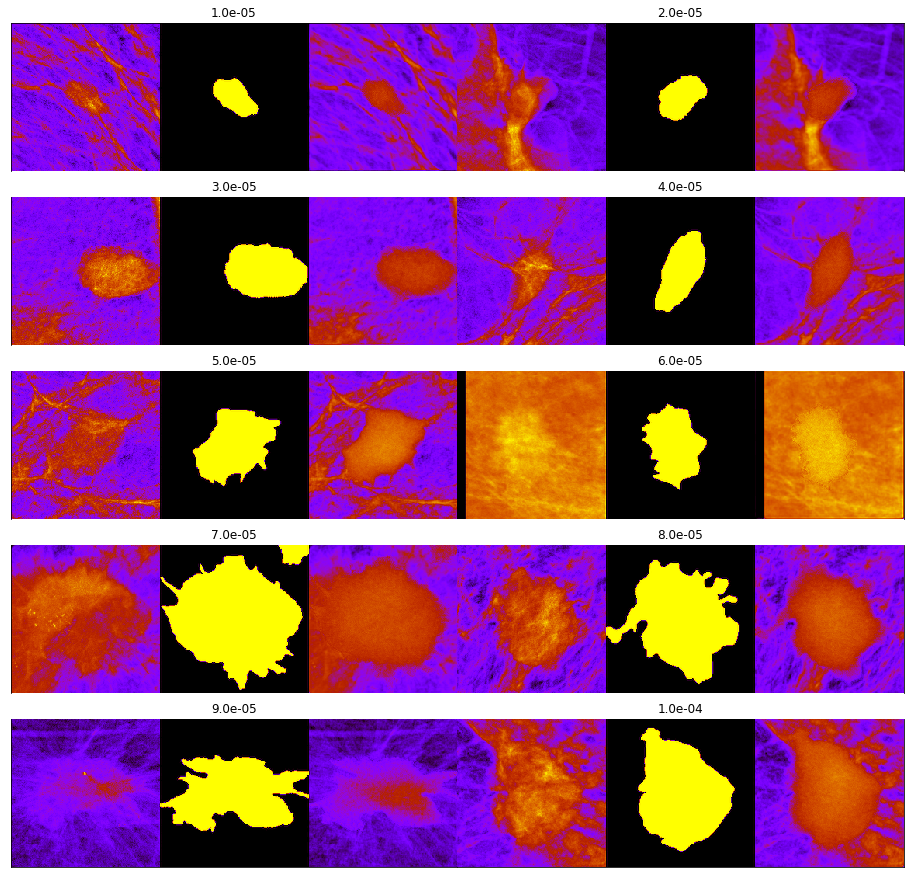

In [24]:
from itertools import product
import matplotlib.gridspec as gridspec

from itertools import product


def squiggle_xy(a, b, c, d):
    i = np.arange(0.0, 2*np.pi, 0.05)
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

learning =  np.linspace(1e-5,1e-4,10)

fig = plt.figure(figsize=(16, 16))
path =  "./validation/mammo"
# gridspec inside gridspec
outer_grid = gridspec.GridSpec(5, 2, wspace=0.0, hspace=0.0)

for i in range(10):
    a = i // 6 + 1
    b = i % 2 + 1
    ax = fig.add_subplot(outer_grid[i])
    img = plt.imread("{}{:.1e}/mammo{:.1e}_256_3450.png".format(path,learning[i],learning[i]))
    ax.imshow(img,cmap = plt.cm.gnuplot)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("{:.1e}".format(learning[i]))
    fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()



# 2. Change normalization in vgg

In [11]:
def compare_loss(data, title,list_exp,log = 0):
    lr = [1e-5,5e-5,1e-4]
    losses = data.shape[0]
    learnings = data.shape[1]

    fig = plt.figure(figsize=(15, 8))
    outer_grid = gridspec.GridSpec(2, losses, wspace=0.1, hspace=0.25)

    for i in range(losses*2):
        ax = fig.add_subplot(outer_grid[i])
        j = i % losses
        k = i // losses    
        for l in range(learnings):
            ax.plot(data[j,l,k,:,0],data[j,l,k,:,1],label = lr[l])
        if log:
            ax.set_xscale('log')
        ax.set_title("{}".format(list_exp[j]))
        plt.legend()
    plt.suptitle(title, fontsize = 20)
    plt.show()

In [3]:
exp = ["lsgan","mammo","dcgan"]

data = []
for i in exp:
    path = "results/{}/{}.npz".format(i,"rms")
    data.append(np.load(path)['loss'])
rms = np.stack(data)

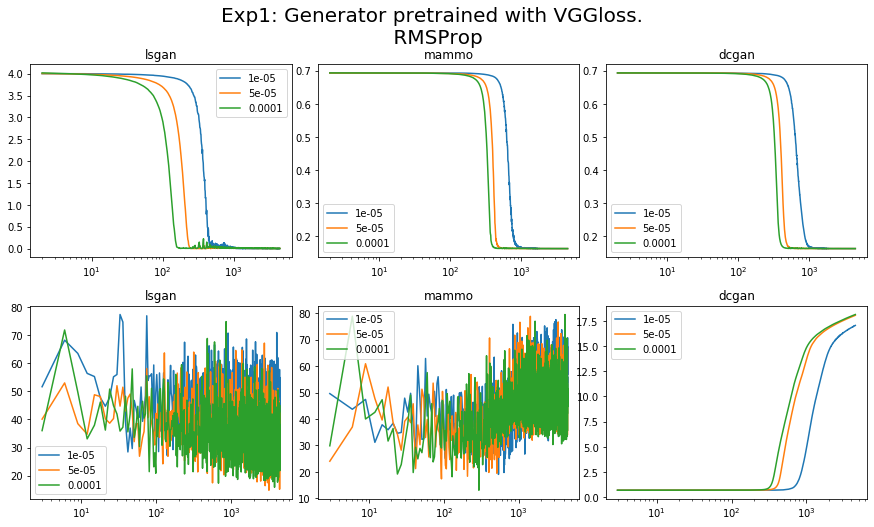

In [5]:


compare_loss(rms,"Exp1: Generator pretrained with VGGloss. \n RMSProp",exp,1)

In [6]:
data = []
for i in exp:
    path = "results/{}/{}.npz".format(i,"adam")
    data.append(np.load(path)['loss'])
adam  = np.stack(data)

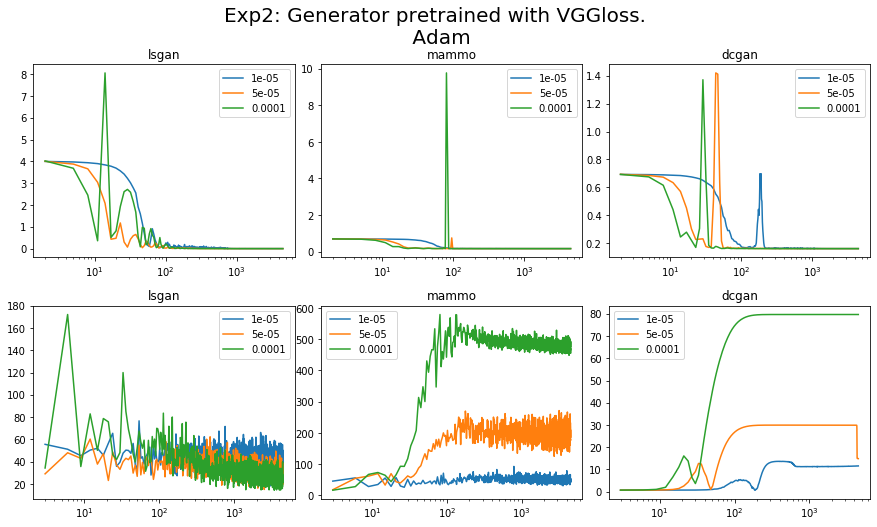

In [7]:
compare_loss(adam,"Exp2: Generator pretrained with VGGloss. \n Adam",exp,1)

Modelo entrenando primero con vgg el generador,
segundo experimento:
    Mismas pruebas pero sin entrenar vgg

# EXP2. Without VGG

In [8]:
exp = ["lsgan","mammo","dcgan"]

data = []
for i in exp:
    path = "results/{}/{}0.npz".format(i,"rms")
    data.append(np.load(path)['loss'])
rms_0 = np.stack(data)

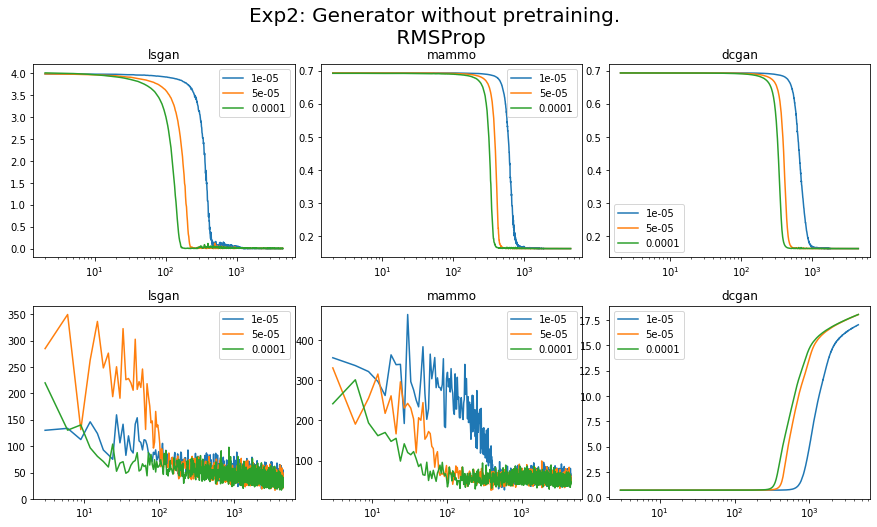

In [9]:
compare_loss(rms_0,"Exp2: Generator without pretraining. \n RMSProp",exp,1)

In [10]:
data = []
for i in exp:
    path = "results/{}/{}0.npz".format(i,"adam")
    data.append(np.load(path)['loss'])
adam_0 = np.stack(data)

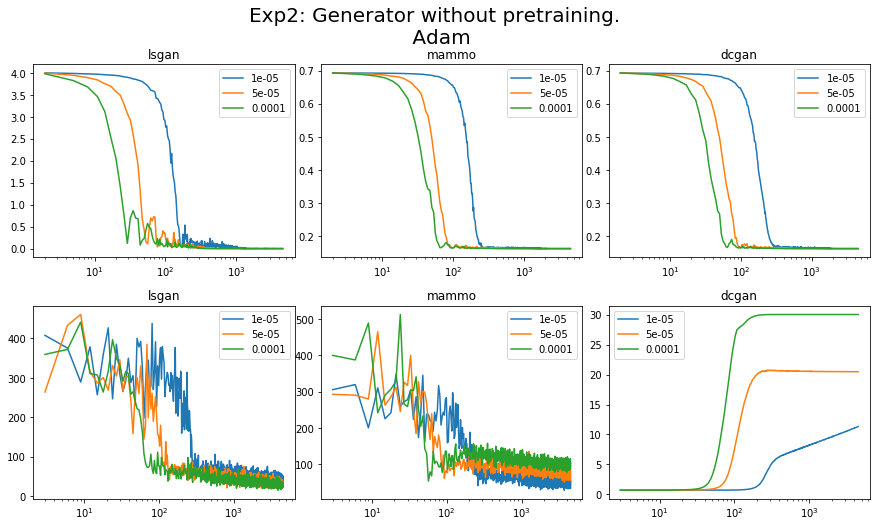

In [11]:
compare_loss(adam_0,"Exp2: Generator without pretraining. \n Adam",exp,1)

In [71]:
im = plt.imread("validation/dcgan_rms_1.0e-04/dcgan_rms_1.0e-04_256_0.png")

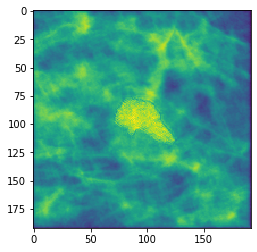

In [73]:
plt.imshow(im[:,(192)*2:])

In [62]:
path =  "./validation/mammo"
img = plt.imread("{}{:.1e}/mammo{:.1e}_256_3450.png".format(path,learning[i],learning[i]))

2.0214273e-05

In [69]:

def get_diference(epocs,path):
    difference = []
    for i in epocs:
        im = plt.imread("{}_256_{}.png".format(path,i))
        origin = im[:,:192].mean()
        fake = im[:,192*2:].mean()
        difference.append(abs(fake-origin))
    return difference

In [11]:
opt =  ["rms","adam"]
vgg =  [0,1]
learning =  [1e-5,5e-5,1e-4]
losses = ["lsgan","mammo","dcgan"]
epocs = np.arange(300,4800,300)

summary = []
for ls in losses:
    for o in opt:
        for lr in learning:
            path = "validation/{}_{}_{:.1e}/{}_{}_{:.1e}".format(ls,o,lr,ls,o,lr)
            dif = get_diference(epocs,path) #mean(fake)-mean(origin) par epocs
            #create experiment
            data = [ls,o,lr,1]
            _ = [data.append(x) for x in dif]
            summary.append(data)
            print(path)

#load exp without vgg
for ls in losses:
    for o in opt:
        for lr in learning:
            path = "validation/{}_{}_0_{:.1e}/{}_{}_0_{:.1e}".format(ls,o,lr,ls,o,lr)
            dif = get_diference(epocs,path) #mean(fake)-mean(origin) par epocs
            data = [ls,o,lr,0]
            _ = [data.append(x) for x in dif]
            summary.append(data)
            print(path)

validation/lsgan_rms_1.0e-05/lsgan_rms_1.0e-05
validation/lsgan_rms_5.0e-05/lsgan_rms_5.0e-05
validation/lsgan_rms_1.0e-04/lsgan_rms_1.0e-04
validation/lsgan_adam_1.0e-05/lsgan_adam_1.0e-05
validation/lsgan_adam_5.0e-05/lsgan_adam_5.0e-05
validation/lsgan_adam_1.0e-04/lsgan_adam_1.0e-04
validation/mammo_rms_1.0e-05/mammo_rms_1.0e-05
validation/mammo_rms_5.0e-05/mammo_rms_5.0e-05
validation/mammo_rms_1.0e-04/mammo_rms_1.0e-04
validation/mammo_adam_1.0e-05/mammo_adam_1.0e-05
validation/mammo_adam_5.0e-05/mammo_adam_5.0e-05
validation/mammo_adam_1.0e-04/mammo_adam_1.0e-04
validation/dcgan_rms_1.0e-05/dcgan_rms_1.0e-05
validation/dcgan_rms_5.0e-05/dcgan_rms_5.0e-05
validation/dcgan_rms_1.0e-04/dcgan_rms_1.0e-04
validation/dcgan_adam_1.0e-05/dcgan_adam_1.0e-05
validation/dcgan_adam_5.0e-05/dcgan_adam_5.0e-05
validation/dcgan_adam_1.0e-04/dcgan_adam_1.0e-04
validation/lsgan_rms_0_1.0e-05/lsgan_rms_0_1.0e-05
validation/lsgan_rms_0_5.0e-05/lsgan_rms_0_5.0e-05
validation/lsgan_rms_0_1.0e-04/lsg

In [7]:
import pandas as pd

In [12]:
#to dataframe
col = ["loss_fuction","optimizer","learning_rate","preTrainVGG"]
_ = [col.append("epoc_" + str(x)) for x in epocs]
results = pd.DataFrame(data = summary, columns=col)
results.head()

,loss_fuction,optimizer,learning_rate,preTrainVGG,epoc_300,epoc_600,epoc_900,epoc_1200,epoc_1500,epoc_1800,epoc_2100,epoc_2400,epoc_2700,epoc_3000,epoc_3300,epoc_3600,epoc_3900,epoc_4200,epoc_4500
0,lsgan,rms,0.00001,1,0.060846,0.011344,0.000914,0.007152,0.002709,0.060353,0.004409,0.038713,0.005438,0.013220,0.011555,0.003513,0.000425,0.018564,0.012858
1,lsgan,rms,0.00005,1,0.077392,0.004138,0.008553,0.001252,0.028667,0.020613,0.018629,0.041921,0.014560,0.007009,0.007094,0.012618,0.009541,0.021201,0.007756
2,lsgan,rms,0.00010,1,0.001223,0.023279,0.012741,0.026129,0.018072,0.024529,0.003027,0.018681,0.013092,0.017819,0.009338,0.052388,0.012249,0.013886,0.017165
3,lsgan,adam,0.00001,1,0.006099,0.011218,0.007754,0.041590,0.015566,0.007326,0.000896,0.046459,0.029031,0.014177,0.031816,0.003228,0.003948,0.036213,0.035321
4,lsgan,adam,0.00005,1,0.044692,0.000226,0.006400,0.001257,0.002766,0.030792,0.039285,0.004031,0.010637,0.001325,0.004366,0.005431,0.003703,0.000344,0.003176


In [13]:
results.to_csv("results_exp_fin.csv",index = False, header=True)



Change in VGG (*****) just inside
=======


exp3: disc it 5,10 without vgg
    lsgan_rms 5e-5,mammo rms 5e-5
    6000 epocs

self.l1_factor = [1200]

def vgg_loss_inside(self):
        #Features extraction and build loss function VGG model       
        #----------- Build VGG networks -----------------     
        vgg_real = build_vgg19(tf.multiply(self.input_real, self.input_mask))
        vgg_fake = build_vgg19(tf.multiply(self.fake_image, self.input_mask), reuse=True)
        
        #First layer
        G_loss_vgg = tf.reduce_mean(tf.abs(vgg_real['input'] - vgg_fake['input']))
        
        for i in range(1, 4):
            conv_str = 'pool' + str(i)
            #get pool
            G_loss_vgg += (self.l1_factor)*tf.reduce_mean(tf.abs(vgg_real[conv_str] - vgg_fake[conv_str]))
        return G_loss_vgg

In [2]:
def get_diference_inside(epocs,path):
    difference = []
    for i in epocs:
        im = plt.imread("{}_256_{}.png".format(path,i))
        origin = im[:,:192]
        fake = im[:,192*2:]
        mask = im[:,192:192*2]
        difference.append(abs(fake[mask == 1].mean()-
                              origin[mask == 1].mean()))
    return difference

### not inside

EXPERIMENTOS SOLO CON VGG al interior sin ponderacion (weight = 1 ), learning rates : 1e-4 y 1e-5

In [6]:
epocs = np.arange(300,15300,300)

summary = []
learning = [1e-4,1e-5]
ls = "lsgan"
o = "rms"
for lr in learning:
    path = "validation/{}_{}_0_{:.1e}_not_in/{}_{}_0_{:.1e}_not_in".format(ls,o,lr,ls,o,lr)
    dif = get_diference_inside(epocs,path) #mean(fake)-mean(origin) par epocs
    #create experiment
    data = [ls,o,lr,1]
    _ = [data.append(x) for x in dif]
    summary.append(data)
    print(path)

validation/lsgan_rms_0_1.0e-04_not_in/lsgan_rms_0_1.0e-04_not_in
validation/lsgan_rms_0_1.0e-05_not_in/lsgan_rms_0_1.0e-05_not_in


In [9]:
exp = ["_not_in","_not_in_"]
#_not_in 1e-4,_not_in_ 1e-5, 
data = []
for i in exp:
    path = "results/lsgan/rms0{}.npz".format(i)
    data.append(np.load(path)['loss'][:,:,:5000,:])
rms_inside = np.stack(data)

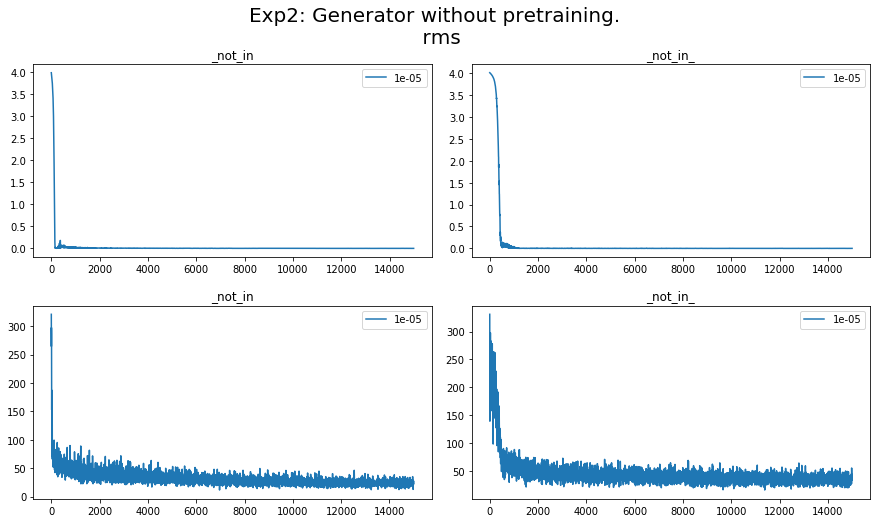

In [12]:
compare_loss(rms_inside,"Exp2: Generator without pretraining. \n rms",exp,0)

In [15]:
[x.shape for x in rms_inside]

[(1, 2, 5000, 2), (1, 2, 5000, 2), (1, 2, 5000, 2)]

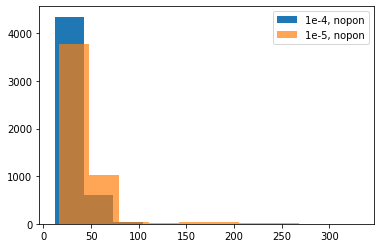

In [68]:
plt.hist(rms_inside[0,0,1,:,1].flatten(), label = '1e-4, nopon')
plt.hist(rms_inside[1,0,1,:,1].flatten(),alpha = 0.7,label= '1e-5, nopon')
plt.legend()
plt.show()

In [13]:
col = ["loss_fuction","optimizer","learning_rate","preTrainVGG"]
_ = [col.append("epoc_" + str(x)) for x in epocs]
results = pd.DataFrame(data = summary, columns=col)
results.head()

,loss_fuction,optimizer,learning_rate,preTrainVGG,epoc_300,epoc_600,epoc_900,epoc_1200,epoc_1500,epoc_1800,...,epoc_12300,epoc_12600,epoc_12900,epoc_13200,epoc_13500,epoc_13800,epoc_14100,epoc_14400,epoc_14700,epoc_15000
0,lsgan,rms,0.00010,1,0.066150,0.047404,0.047209,0.007089,0.090643,0.006678,...,0.025723,0.033128,0.012896,0.028271,0.014079,0.015414,0.009006,0.011159,0.041702,0.038216
1,lsgan,rms,0.00001,1,0.285608,0.077255,0.067968,0.100435,0.012697,0.039933,...,0.037322,0.027064,0.044379,0.013914,0.020264,0.013639,0.026993,0.016412,0.034154,0.013016


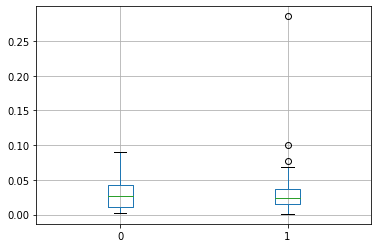

In [14]:
results.loc[:,"epoc_300":].T.plot(kind = "box",grid =True)


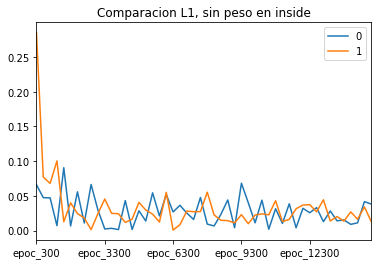

In [17]:
results.loc[:,"epoc_300":].T.plot(title = "Comparacion L1, sin peso en inside")

## ponderado 


# Features extraction and build loss function VGG model       
    #----------- Build VGG networks -----------------     
    vgg_real = build_vgg19(tf.multiply(self.input_real, self.input_mask))
    vgg_fake = build_vgg19(tf.multiply(self.fake_image, self.input_mask), reuse=True)

    #First layer
    G_loss_vgg = tf.reduce_mean(tf.abs(vgg_real['input'] - vgg_fake['input']))

    for i in range(1, 4):
        conv_str = 'pool' + str(i)
        #get pool
pond_ : -->>>>> G_loss_vgg += (self.l1_factor)*tf.reduce_mean(tf.abs(vgg_real[conv_str] - vgg_fake[conv_str]))*
   
    return G_loss_vgg
    
# Doble ponderaciôn

vgg_real = build_vgg19(tf.multiply(self.input_real, self.input_mask))
    vgg_fake = build_vgg19(tf.multiply(self.fake_image, self.input_mask), reuse=True)

    #First layer
pond_ : -->>>>>    G_loss_vgg = (self.l1_factor)*tf.reduce_mean(tf.abs(vgg_real['input'] - vgg_fake['input']))

    for i in range(1, 4):
        conv_str = 'pool' + str(i)
        #get pool
pond_ : -->>>>> G_loss_vgg += (self.l1_factor*1.5)*tf.reduce_mean(tf.abs(vgg_real[conv_str] - vgg_fake[conv_str]))*
   
    return G_loss_vgg
    

In [3]:
#------
exp = ["_not_in_pond","_not_in_pond_"]
#_not_in 1e-4,_not_in_ 1e-5, 1e-4 ponderado 1200 
data = []
for i in exp:
    path = "results/lsgan/rms0{}.npz".format(i)
    data.append(np.load(path)['loss'][:,:,:,:])
rms_inside = np.stack(data)

In [4]:
epocs = np.arange(300,15300,300)

summary = []

ls = "lsgan"
o = "rms"
lr = 1e-4
exp = ["_not_in_pond","_not_in_pond_"]
for i in exp:
    path = "validation/{}_{}_0_{:.1e}{}/{}_{}_0_{:.1e}{}".format(ls,o,lr,i,ls,o,lr,i)
    dif = get_diference_inside(epocs,path) #mean(fake)-mean(origin) par epocs
    #create experiment
    data = [ls,o,lr,1]
    _ = [data.append(x) for x in dif]
    summary.append(data)
    print(path)
exp = ["_not_in_pond_"]
epocs = np.arange(15300,30300,300)
for i in exp:
    path = "validation/{}_{}_0_{:.1e}{}/{}_{}_0_{:.1e}{}".format(ls,o,lr,i,ls,o,lr,i)
    dif = get_diference_inside(epocs,path) #mean(fake)-mean(origin) par epocs
    #create experiment
    data = [ls,o,lr,1]
    _ = [data.append(x) for x in dif]
    summary.append(data)
    print(path)

validation/lsgan_rms_0_1.0e-04_not_in_pond/lsgan_rms_0_1.0e-04_not_in_pond
validation/lsgan_rms_0_1.0e-04_not_in_pond_/lsgan_rms_0_1.0e-04_not_in_pond_
validation/lsgan_rms_0_1.0e-04_not_in_pond_/lsgan_rms_0_1.0e-04_not_in_pond_


In [200]:
col = ["loss_fuction","optimizer","learning_rate","preTrainVGG"]
_ = [col.append("epoc_" + str(x)) for x in epocs]
results = pd.DataFrame(data = summary, columns=col)
results.head()

,loss_fuction,optimizer,learning_rate,preTrainVGG,epoc_15300,epoc_15600,epoc_15900,epoc_16200,epoc_16500,epoc_16800,...,epoc_27300,epoc_27600,epoc_27900,epoc_28200,epoc_28500,epoc_28800,epoc_29100,epoc_29400,epoc_29700,epoc_30000
0,lsgan,rms,0.0001,1,0.043722,0.007673,0.038004,0.034565,0.010684,0.030323,...,0.007933,0.015105,0.006613,0.031067,0.016786,0.009797,0.022814,0.008062,0.091565,0.036698
1,lsgan,rms,0.0001,1,0.107173,0.003506,0.032789,0.011719,0.016627,0.033080,...,0.041285,0.042460,0.070950,0.017052,0.029733,0.030935,0.034582,0.002395,0.017969,0.042161
2,lsgan,rms,0.0001,1,0.037217,0.018884,0.004957,0.046735,0.027032,0.056582,...,0.008274,0.002137,0.012765,0.003283,0.031051,0.017836,0.004074,0.012140,0.008074,0.010753


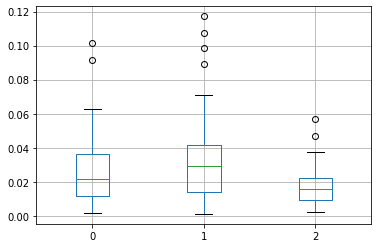

In [201]:
results.loc[:,"epoc_15300":].T.plot(kind = "box",grid =True)


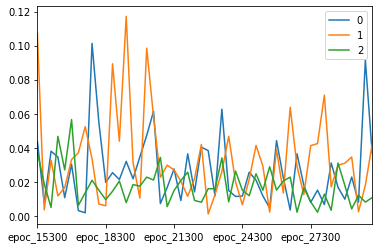

In [202]:
results.loc[:,"epoc_15300":].T.plot()
